In [1]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", probability=True),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

In [3]:
df_all_1key = pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_1key_csv/features_all.csv')
df_all_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0380.py.enc,pyth_cbc,7.975430,128.420646,5389.583310,73.413781,-0.025905,-1.184919,747957,10.249397,...,23,31,23,32,24,29,30,30,30,DES
1,file0666.py.enc,pyth_cbc,7.956038,129.482713,5503.419914,74.185038,-0.014317,-1.202608,465286,10.154895,...,14,21,19,19,25,21,16,20,19,DES
2,file0605.py.enc,pyth_cbc,7.976591,128.052661,5496.776672,74.140250,-0.008124,-1.226710,749250,10.298833,...,27,27,32,22,24,24,31,32,25,DES
3,file0705.py.enc,pyth_cbc,7.938930,127.600529,5368.043465,73.266933,-0.004004,-1.174174,319718,10.282356,...,13,10,15,14,7,7,13,10,14,DES
4,file0678.py.enc,pyth_cbc,7.956176,128.205517,5300.127991,72.801978,-0.010065,-1.170839,426765,10.298297,...,9,20,15,13,17,18,17,15,8,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,image_0083.bmp.enc,bmp_cbc,7.997463,127.453839,5440.410459,73.759138,0.000666,-1.192649,6298551,10.258089,...,260,250,224,236,213,224,223,249,227,AES
10796,image_0234.bmp.enc,bmp_cbc,7.997121,128.106613,5449.098975,73.818013,-0.006583,-1.196848,6155155,10.260659,...,243,227,204,238,229,252,266,230,227,AES
10797,image_0224.bmp.enc,bmp_cbc,7.998284,127.306842,5445.492960,73.793583,0.004080,-1.198171,10685378,10.281232,...,400,384,408,395,363,387,407,403,382,AES
10798,image_0152.bmp.enc,bmp_cbc,7.998621,127.667952,5471.480301,73.969455,-0.002301,-1.200311,14033818,10.279900,...,516,524,517,484,545,547,510,513,584,AES


In [12]:
df_all_3keys = pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_3keys_csv/features_all.csv')
df_all_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0380.py.enc,pyth_cbc,7.974221,127.557725,5592.743578,74.784648,0.003207,-1.220148,748959,10.256260,...,31,31,31,31,29,24,34,27,31,DES
1,file0666.py.enc,pyth_cbc,7.953225,125.829787,5532.734769,74.382355,0.055701,-1.219171,477558,10.287942,...,16,22,16,22,22,16,12,16,20,DES
2,file0605.py.enc,pyth_cbc,7.972926,129.097537,5442.398895,73.772616,-0.019102,-1.185199,745327,10.271836,...,27,27,30,29,39,36,27,26,30,DES
3,file0705.py.enc,pyth_cbc,7.931418,127.586640,5436.585086,73.733202,0.018238,-1.200743,324014,10.351207,...,13,9,18,6,10,11,11,13,21,DES
4,file0678.py.enc,pyth_cbc,7.956634,124.695328,5415.353000,73.589082,0.046369,-1.193314,428862,10.323567,...,7,18,14,16,11,13,11,17,15,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,image_0083.bmp.enc,bmp_cbc,7.996640,127.290096,5494.906087,74.127634,0.006148,-1.211045,6354320,10.303403,...,256,225,247,241,256,211,247,227,213,AES
10796,image_0234.bmp.enc,bmp_cbc,7.996610,127.025469,5484.040111,74.054305,0.005242,-1.205377,6158221,10.263214,...,192,248,246,190,206,237,237,249,221,AES
10797,image_0224.bmp.enc,bmp_cbc,7.998067,127.729177,5456.770286,73.869955,-0.004794,-1.199894,10700065,10.288295,...,352,381,394,397,356,388,397,386,415,AES
10798,image_0152.bmp.enc,bmp_cbc,7.998584,127.747026,5466.126448,73.933257,-0.004477,-1.200710,14019915,10.274807,...,528,508,535,507,509,524,504,554,501,AES


In [4]:
df_all_6keys = pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_6keys_csv/features_all.csv')
df_all_6keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0380.py.enc,pyth_cbc,7.971530,128.588764,5498.892121,74.154515,-0.015852,-1.199617,760212,10.333022,...,30,29,29,37,30,33,32,33,35,DES
1,file0666.py.enc,pyth_cbc,7.956870,128.366135,5542.260006,74.446357,-0.045058,-1.215967,469426,10.199973,...,15,17,26,15,12,18,14,20,16,DES
2,file0605.py.enc,pyth_cbc,7.970197,128.708097,5445.534555,73.793865,-0.033244,-1.199168,757134,10.352876,...,29,15,31,33,30,31,21,26,24,DES
3,file0705.py.enc,pyth_cbc,7.932306,129.303571,5613.891971,74.925910,-0.034414,-1.235022,319532,10.279365,...,13,14,12,12,14,18,7,11,15,DES
4,file0678.py.enc,pyth_cbc,7.946145,128.495775,5290.799684,72.737883,-0.004960,-1.163643,422815,10.250527,...,12,16,12,10,24,20,19,16,20,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,image_0083.bmp.enc,bmp_cbc,7.997147,127.216737,5433.157299,73.709954,0.004285,-1.191868,6350729,10.300491,...,235,243,236,227,226,243,227,220,193,AES
10796,image_0234.bmp.enc,bmp_cbc,7.996791,127.232365,5466.171222,73.933560,0.004697,-1.196802,6142061,10.249739,...,223,221,243,236,242,236,225,226,238,AES
10797,image_0224.bmp.enc,bmp_cbc,7.997801,127.137474,5465.564978,73.929459,0.003575,-1.205555,10711229,10.293661,...,433,377,377,390,381,356,383,389,357,AES
10798,image_0152.bmp.enc,bmp_cbc,7.998624,127.890776,5469.060020,73.953093,-0.007399,-1.205690,14041619,10.282757,...,499,522,531,536,484,542,520,540,486,AES


In [5]:
encoder = LabelEncoder()
df_all_1key['algorithm'] = encoder.fit_transform(df_all_1key['algorithm'])
print(encoder.classes_)

X = df_all_1key.drop(columns=["algorithm", "file_name", "format"])
y = df_all_1key["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []
    
    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

(<pandas.io.formats.style.Styler at 0x173a5b7f0>,
 <pandas.io.formats.style.Styler at 0x173a73dc0>)

In [7]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.505556,0.011061,0.494630,0.013073,0.505556,0.011061,0.497863,0.012973,1.021740,0.792526
1,SVM,0.387963,0.006163,0.366614,0.041624,0.387963,0.006163,0.324452,0.017940,1.166129,0.718495
2,NaiveBayes,0.372407,0.008474,0.343004,0.037996,0.372407,0.008474,0.306869,0.017380,5.447662,0.695936
3,KNN,0.465000,0.010974,0.457578,0.011070,0.465000,0.010974,0.454713,0.011952,6.781934,0.725430
4,Bagging,0.498241,0.006888,0.486795,0.008471,0.498241,0.006888,0.489520,0.008685,1.018894,0.789220
5,AdaBoost,0.430556,0.024736,0.438366,0.017033,0.430556,0.024736,0.388183,0.028587,1.582972,0.748425


In [1]:
import pandas as pd
import io

csv_data = """
RandomForest,0.505556,0.011061,0.494630,0.013073,0.505556,0.011061,0.497863,0.012973,1.021740,0.792526
SVM,0.387963,0.006163,0.366614,0.041624,0.387963,0.006163,0.324452,0.017940,1.166129,0.718495
NaiveBayes,0.372407,0.008474,0.343004,0.037996,0.372407,0.008474,0.306869,0.017380,5.447662,0.695936
KNN,0.465000,0.010974,0.457578,0.011070,0.465000,0.010974,0.454713,0.011952,6.781934,0.725430
Bagging,0.498241,0.006888,0.486795,0.008471,0.498241,0.006888,0.489520,0.008685,1.018894,0.789220
AdaBoost,0.430556,0.024736,0.438366,0.017033,0.430556,0.024736,0.388183,0.028587,1.582972,0.748425
"""

# Definicje polskich nazw kolumn (11 kolumn, w tym AUC)
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame (opcjonalnie, pokaże tabelę w konsoli)
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.505556,0.011061,0.494630,0.013073,0.505556,0.011061,0.497863,0.012973,1.021740,0.792526
1,SVM,0.387963,0.006163,0.366614,0.041624,0.387963,0.006163,0.324452,0.017940,1.166129,0.718495
2,NaiveBayes,0.372407,0.008474,0.343004,0.037996,0.372407,0.008474,0.306869,0.017380,5.447662,0.695936
3,KNN,0.465000,0.010974,0.457578,0.011070,0.465000,0.010974,0.454713,0.011952,6.781934,0.725430
4,Bagging,0.498241,0.006888,0.486795,0.008471,0.498241,0.006888,0.489520,0.008685,1.018894,0.789220
5,AdaBoost,0.430556,0.024736,0.438366,0.017033,0.430556,0.024736,0.388183,0.028587,1.582972,0.748425


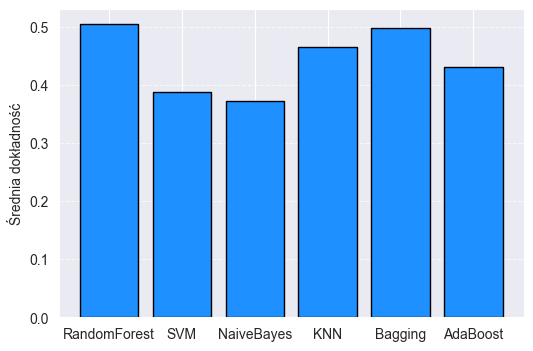

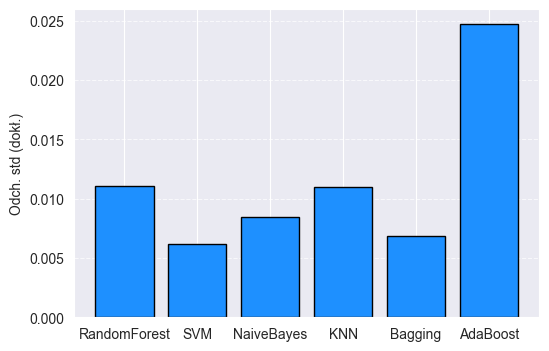

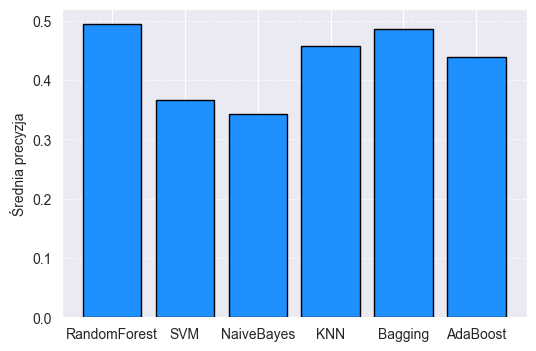

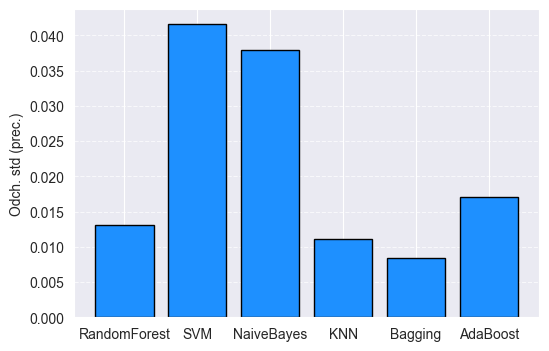

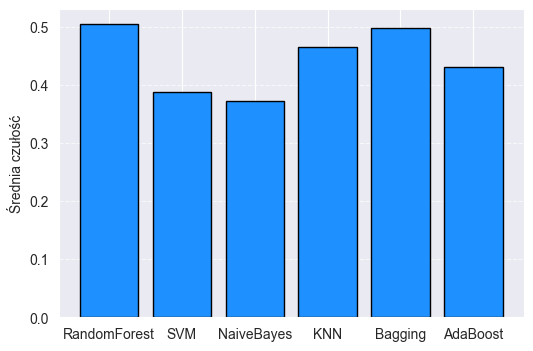

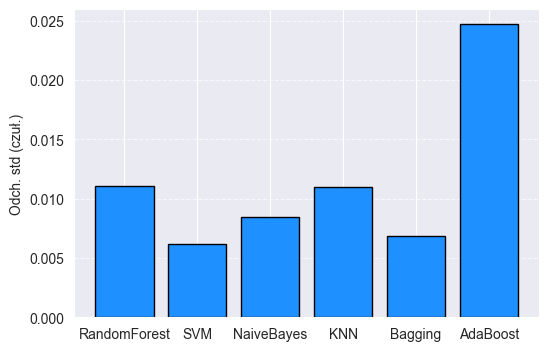

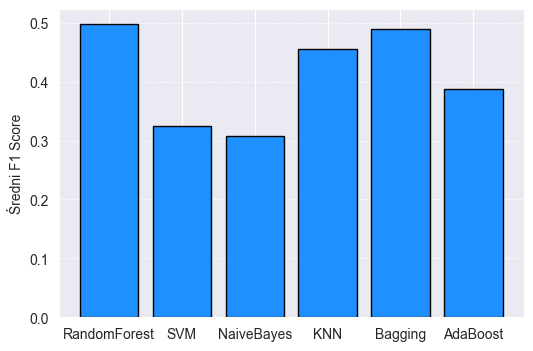

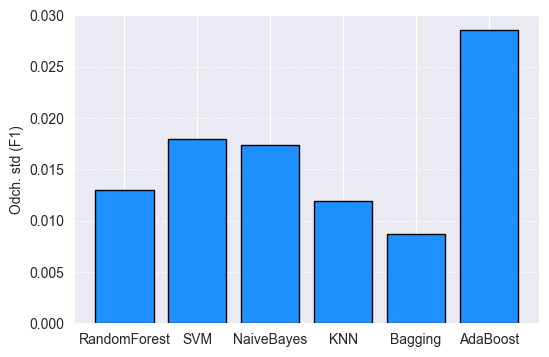

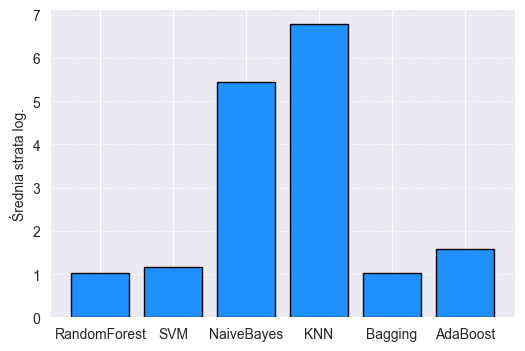

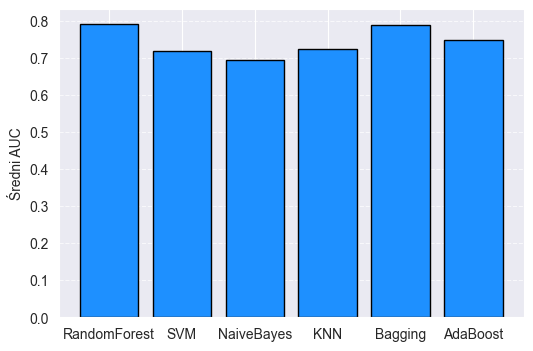

In [2]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

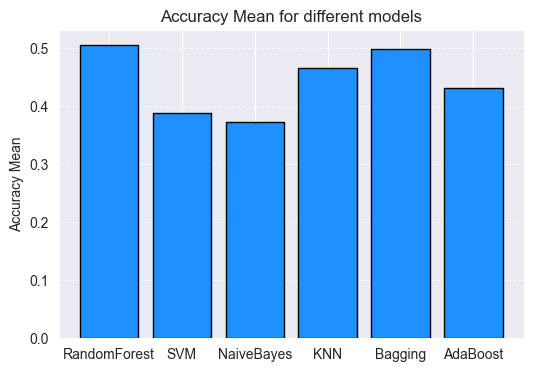

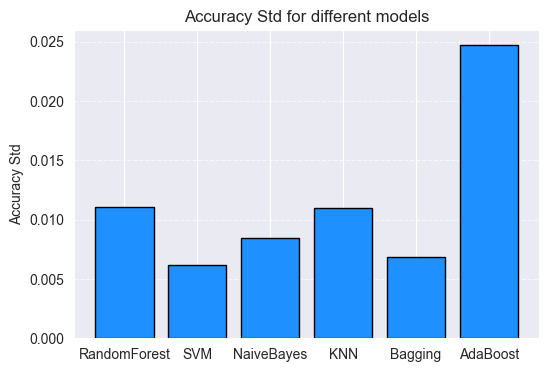

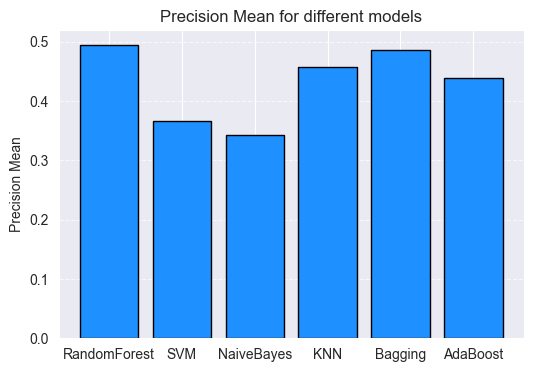

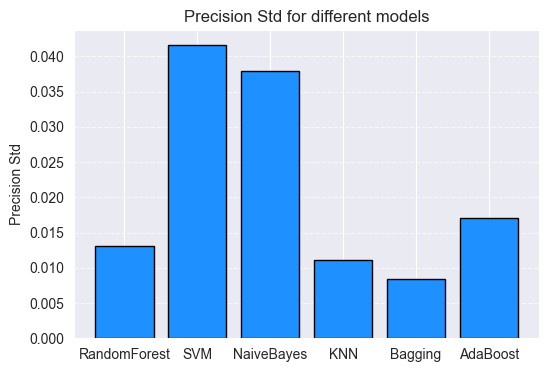

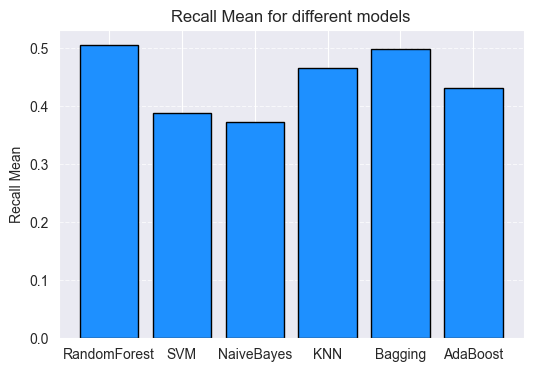

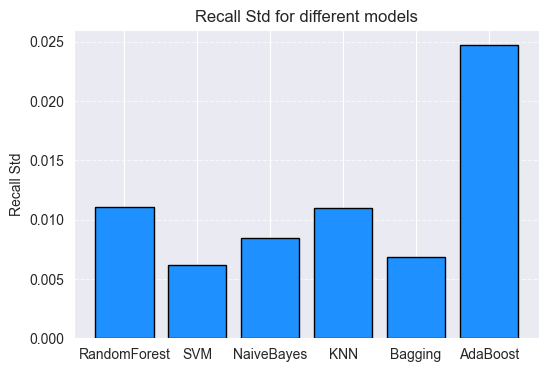

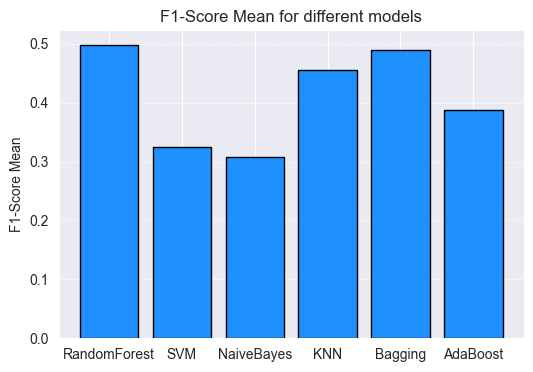

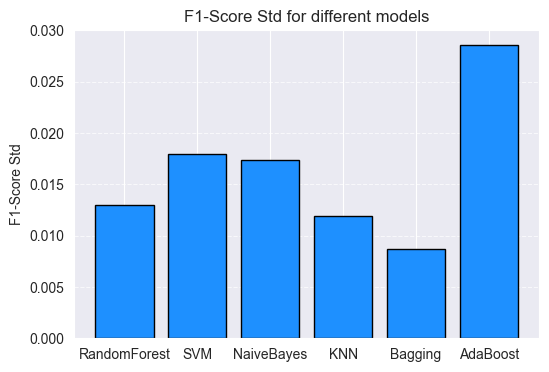

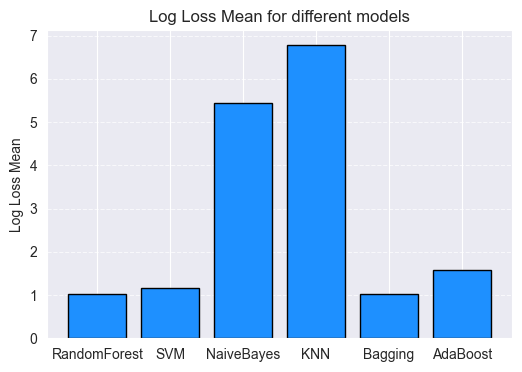

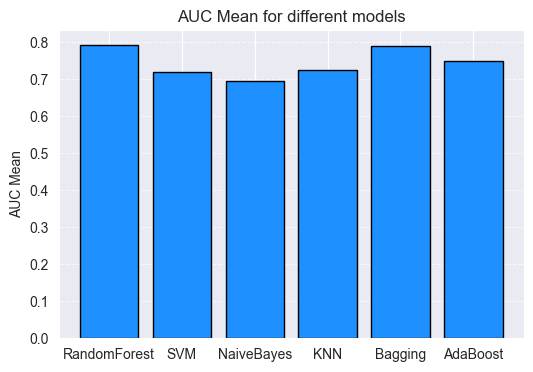

Best model: RandomForest with F1-Score = 0.4978127119162295
Worst model: NaiveBayes with F1-Score = 0.30741550486049457


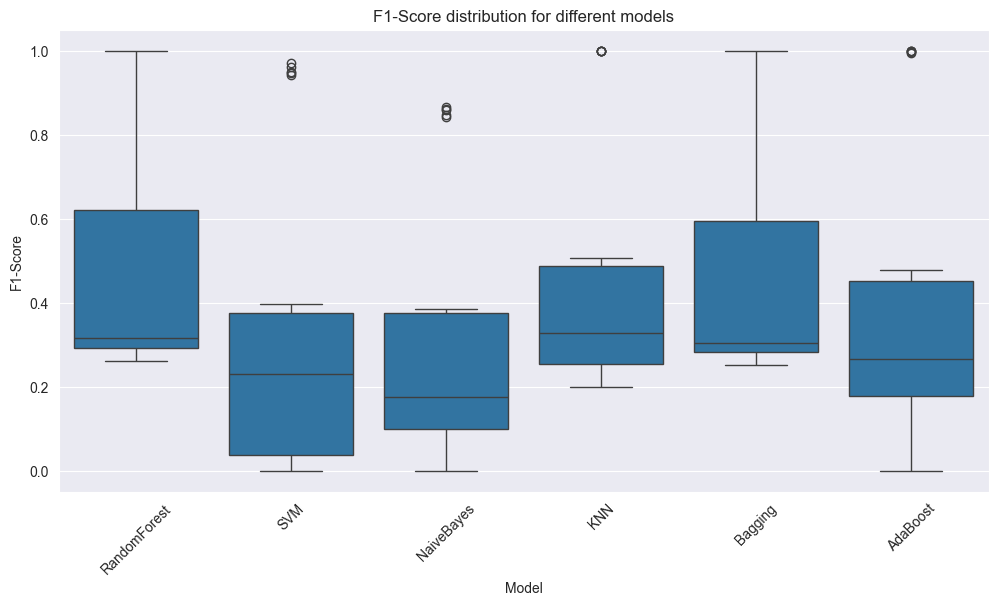

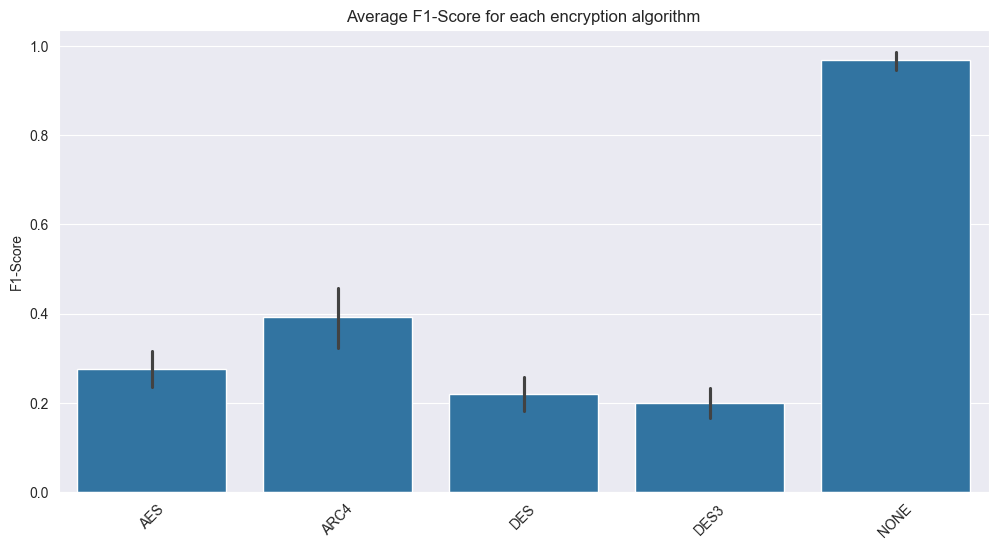

In [8]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [10]:
df_class_results_1key = pd.read_csv('df_class_results_1800_cbc_1key.csv')
df_class_results_1key

,0,RandomForest,0.1,0.278571,0.265909,0.272093
0,1,RandomForest,1,0.496337,0.698454,0.580300
1,2,RandomForest,2,0.317280,0.260465,0.286079
2,3,RandomForest,3,0.289003,0.250000,0.268090
3,4,RandomForest,4,1.000000,1.000000,1.000000
4,5,RandomForest,0,0.301370,0.314286,0.307692
...,...,...,...,...,...,...
144,145,AdaBoost,0,0.000000,0.000000,0.000000
145,146,AdaBoost,1,0.588235,0.110865,0.186567
146,147,AdaBoost,2,0.316583,0.145833,0.199683
147,148,AdaBoost,3,0.227023,0.817284,0.355341


In [13]:
encoder = LabelEncoder()
df_all_3keys['algorithm'] = encoder.fit_transform(df_all_3keys['algorithm'])
print(encoder.classes_)

X = df_all_3keys.drop(columns=["algorithm", "file_name", "format"])
y = df_all_3keys["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

(<pandas.io.formats.style.Styler at 0x173a73bb0>,
 <pandas.io.formats.style.Styler at 0x17f7b4fd0>)

In [14]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.465463,0.005644,0.461344,0.006477,0.465463,0.005644,0.461796,0.006136,1.074846,0.759183
1,SVM,0.376574,0.007394,0.324720,0.043712,0.376574,0.007394,0.303807,0.024813,1.169681,0.696584
2,NaiveBayes,0.374815,0.010321,0.346690,0.046260,0.374815,0.010321,0.309936,0.012741,5.578744,0.681543
3,KNN,0.428241,0.009338,0.425335,0.010283,0.428241,0.009338,0.422351,0.008938,7.042346,0.705935
4,Bagging,0.468056,0.009912,0.463935,0.011113,0.468056,0.009912,0.464063,0.010905,1.075359,0.763484
5,AdaBoost,0.414722,0.014147,0.436191,0.031321,0.414722,0.014147,0.352026,0.016624,1.583320,0.722189


In [5]:
import pandas as pd
import io

csv_data = """
RandomForest,0.465463,0.005644,0.461344,0.006477,0.465463,0.005644,0.461796,0.006136,1.074846,0.759183
SVM,0.376574,0.007394,0.324720,0.043712,0.376574,0.007394,0.303807,0.024813,1.169681,0.696584
NaiveBayes,0.374815,0.010321,0.346690,0.046260,0.374815,0.010321,0.309936,0.012741,5.578744,0.681543
KNN,0.428241,0.009338,0.425335,0.010283,0.428241,0.009338,0.422351,0.008938,7.042346,0.705935
Bagging,0.468056,0.009912,0.463935,0.011113,0.468056,0.009912,0.464063,0.010905,1.075359,0.763484
AdaBoost,0.414722,0.014147,0.436191,0.031321,0.414722,0.014147,0.352026,0.016624,1.583320,0.722189
"""

# Definicje polskich nazw kolumn (11 kolumn, w tym AUC)
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame (opcjonalnie, pokaże tabelę w konsoli)
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.465463,0.005644,0.461344,0.006477,0.465463,0.005644,0.461796,0.006136,1.074846,0.759183
1,SVM,0.376574,0.007394,0.324720,0.043712,0.376574,0.007394,0.303807,0.024813,1.169681,0.696584
2,NaiveBayes,0.374815,0.010321,0.346690,0.046260,0.374815,0.010321,0.309936,0.012741,5.578744,0.681543
3,KNN,0.428241,0.009338,0.425335,0.010283,0.428241,0.009338,0.422351,0.008938,7.042346,0.705935
4,Bagging,0.468056,0.009912,0.463935,0.011113,0.468056,0.009912,0.464063,0.010905,1.075359,0.763484
5,AdaBoost,0.414722,0.014147,0.436191,0.031321,0.414722,0.014147,0.352026,0.016624,1.583320,0.722189


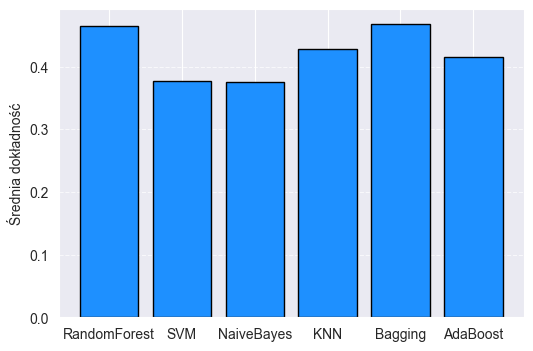

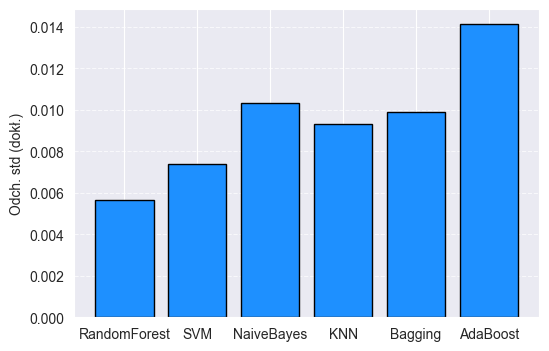

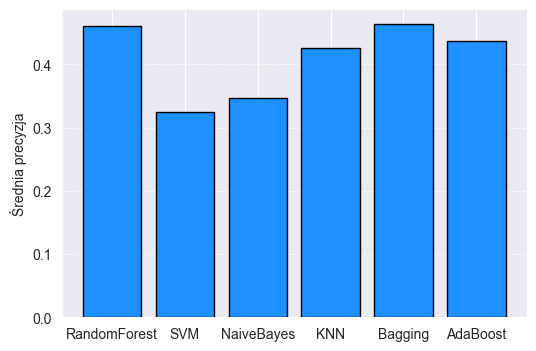

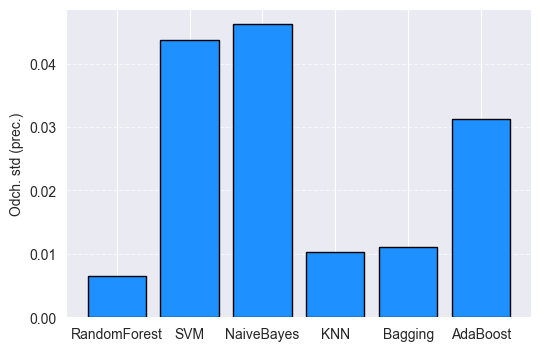

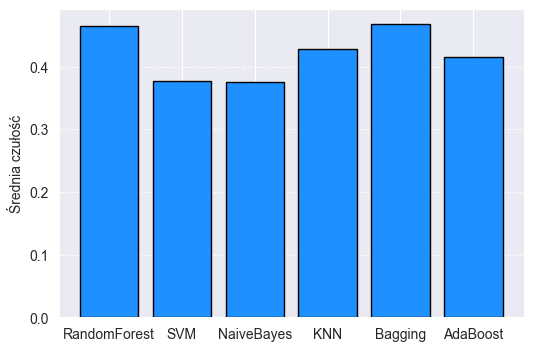

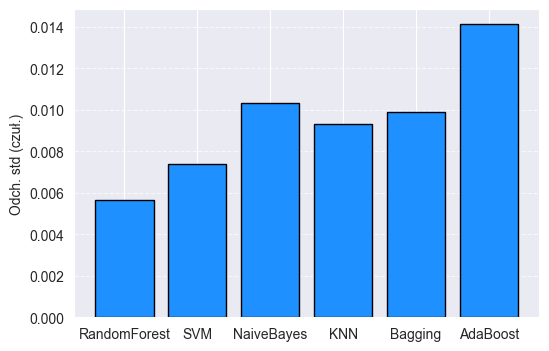

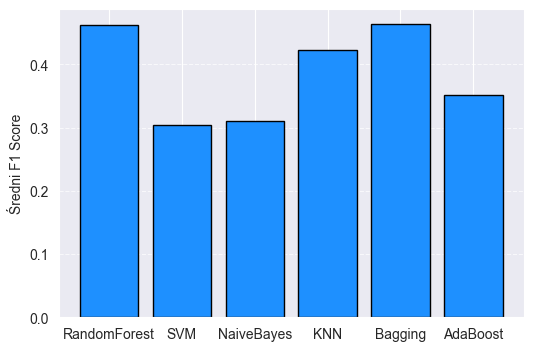

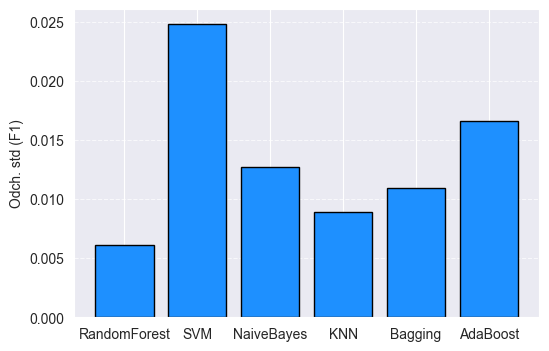

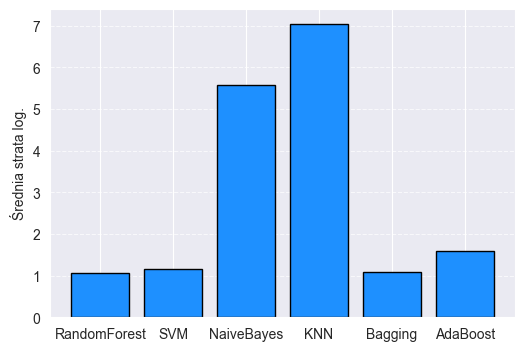

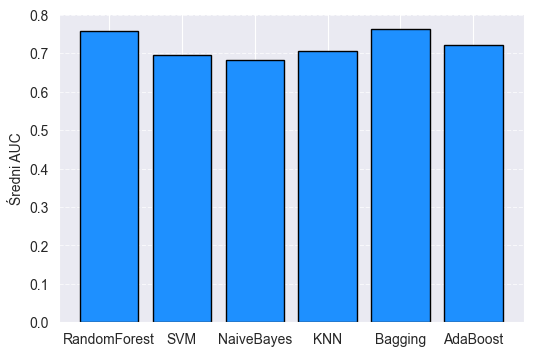

In [6]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

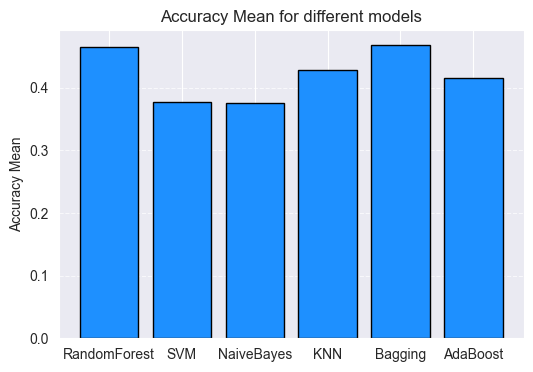

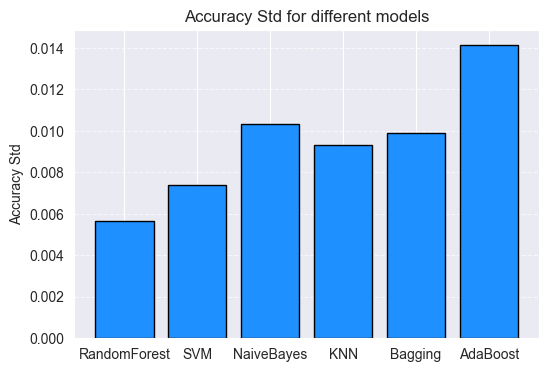

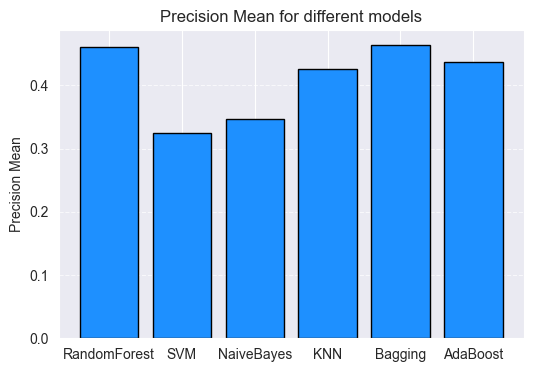

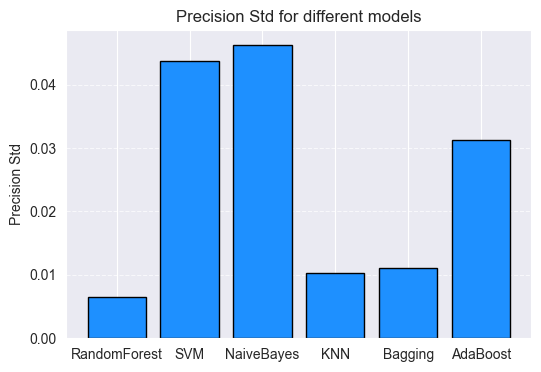

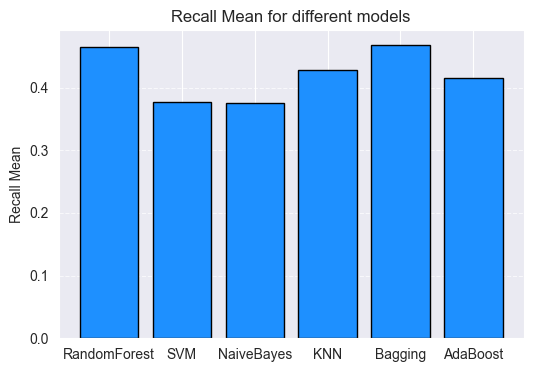

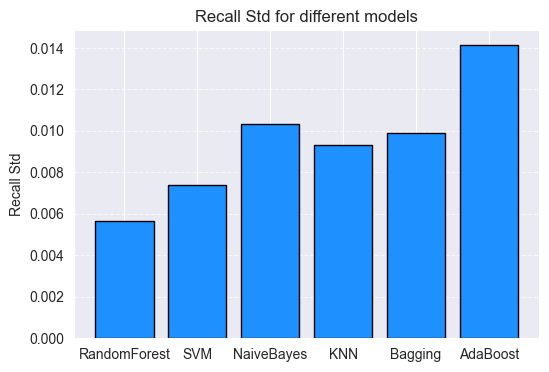

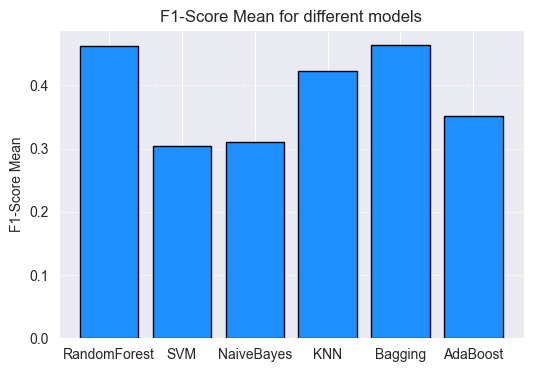

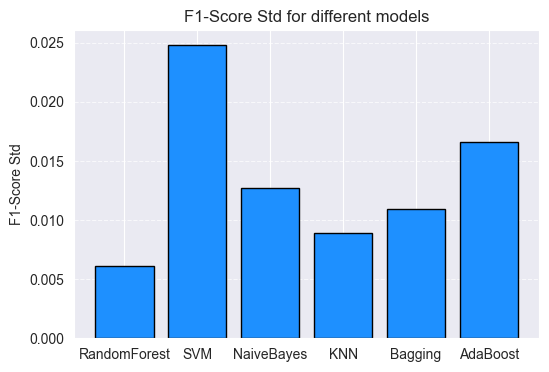

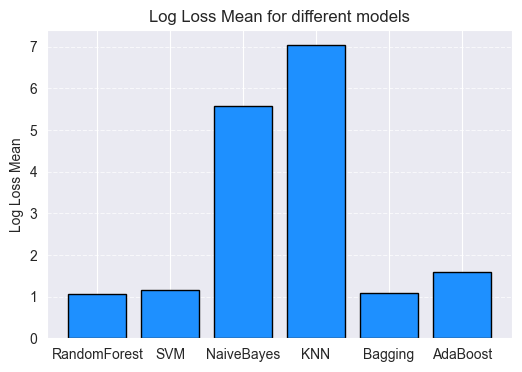

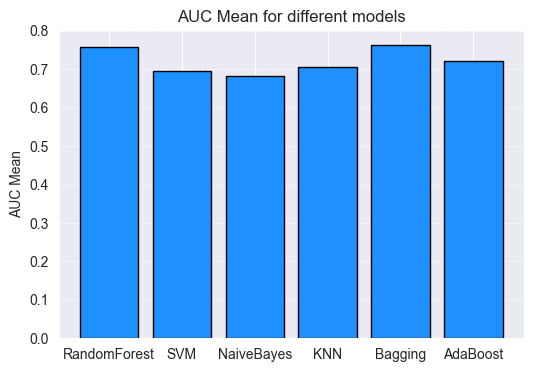

Best model: Bagging with F1-Score = 0.4639114556706815
Worst model: SVM with F1-Score = 0.3068767385426696


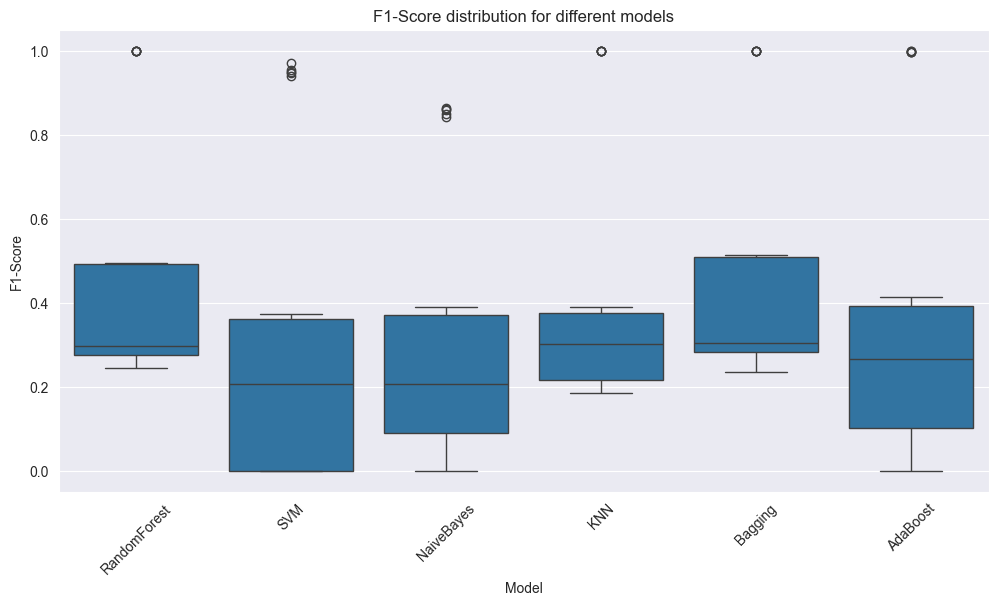

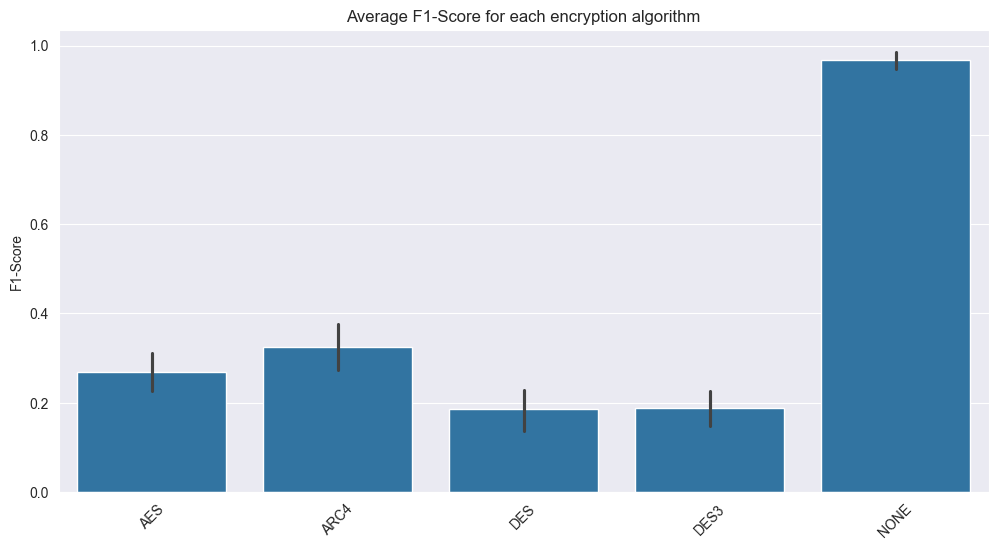

In [15]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [18]:
df_class_results_3keys = pd.read_csv('df_class_results_1800_cbc_3keys.csv')
df_class_results_3keys

,Unnamed: 0,Model,Class,Precision,Recall,F1-Score
0,0,RandomForest,0,0.285714,0.263636,0.274232
1,1,RandomForest,1,0.388298,0.564433,0.460084
2,2,RandomForest,2,0.286070,0.267442,0.276442
3,3,RandomForest,3,0.325444,0.243363,0.278481
4,4,RandomForest,4,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
145,145,AdaBoost,0,0.000000,0.000000,0.000000
146,146,AdaBoost,1,0.525424,0.068736,0.121569
147,147,AdaBoost,2,0.319635,0.162037,0.215054
148,148,AdaBoost,3,0.226776,0.819753,0.355270


In [19]:
encoder = LabelEncoder()
df_all_6keys['algorithm'] = encoder.fit_transform(df_all_6keys['algorithm'])
print(encoder.classes_)

X = df_all_6keys.drop(columns=["algorithm", "file_name", "format"])
y = df_all_6keys["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

(<pandas.io.formats.style.Styler at 0x17f640ac0>,
 <pandas.io.formats.style.Styler at 0x3045c6190>)

In [20]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.435556,0.007416,0.433920,0.007334,0.435556,0.007416,0.433448,0.007114,1.101814,0.734233
1,SVM,0.377870,0.007705,0.349382,0.087737,0.377870,0.007705,0.305478,0.025729,1.168291,0.700143
2,NaiveBayes,0.368056,0.007106,0.319950,0.051727,0.368056,0.007106,0.301754,0.016668,5.520691,0.679731
3,KNN,0.424815,0.012163,0.425315,0.012756,0.424815,0.012163,0.420183,0.012040,7.423387,0.694983
4,Bagging,0.447130,0.010233,0.444488,0.011791,0.447130,0.010233,0.444269,0.011966,1.118152,0.741175
5,AdaBoost,0.412037,0.005900,0.455488,0.033054,0.412037,0.005900,0.336539,0.009126,1.584309,0.721015


In [3]:
import pandas as pd
import io

csv_data = """
RandomForest,0.435556,0.007416,0.433920,0.007334,0.435556,0.007416,0.433448,0.007114,1.101814,0.734233
SVM,0.377870,0.007705,0.349382,0.087737,0.377870,0.007705,0.305478,0.025729,1.168291,0.700143
NaiveBayes,0.368056,0.007106,0.319950,0.051727,0.368056,0.007106,0.301754,0.016668,5.520691,0.679731
KNN,0.424815,0.012163,0.425315,0.012756,0.424815,0.012163,0.420183,0.012040,7.423387,0.694983
Bagging,0.447130,0.010233,0.444488,0.011791,0.447130,0.010233,0.444269,0.011966,1.118152,0.741175
AdaBoost,0.412037,0.005900,0.455488,0.033054,0.412037,0.005900,0.336539,0.009126,1.584309,0.721015
"""

# Definicje polskich nazw kolumn (11 kolumn, w tym AUC)
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame (opcjonalnie, pokaże tabelę w konsoli)
df  

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.435556,0.007416,0.433920,0.007334,0.435556,0.007416,0.433448,0.007114,1.101814,0.734233
1,SVM,0.377870,0.007705,0.349382,0.087737,0.377870,0.007705,0.305478,0.025729,1.168291,0.700143
2,NaiveBayes,0.368056,0.007106,0.319950,0.051727,0.368056,0.007106,0.301754,0.016668,5.520691,0.679731
3,KNN,0.424815,0.012163,0.425315,0.012756,0.424815,0.012163,0.420183,0.012040,7.423387,0.694983
4,Bagging,0.447130,0.010233,0.444488,0.011791,0.447130,0.010233,0.444269,0.011966,1.118152,0.741175
5,AdaBoost,0.412037,0.005900,0.455488,0.033054,0.412037,0.005900,0.336539,0.009126,1.584309,0.721015


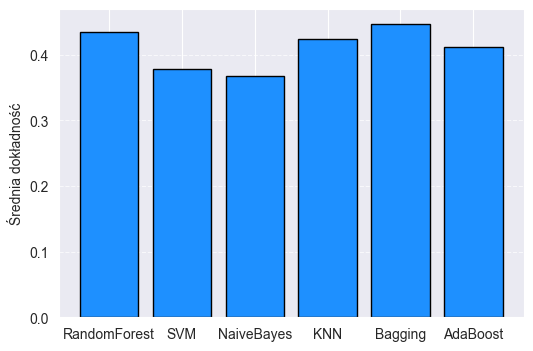

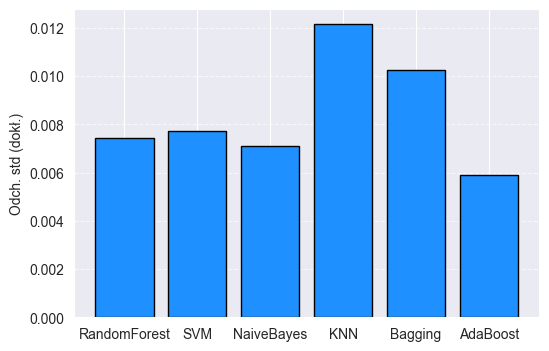

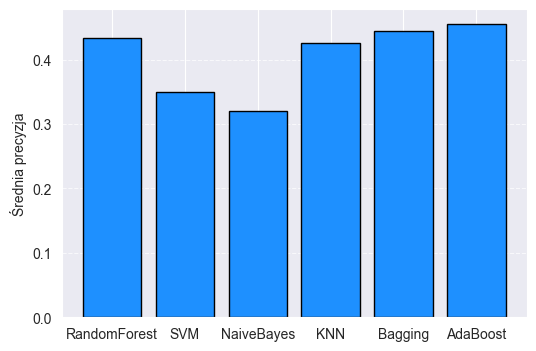

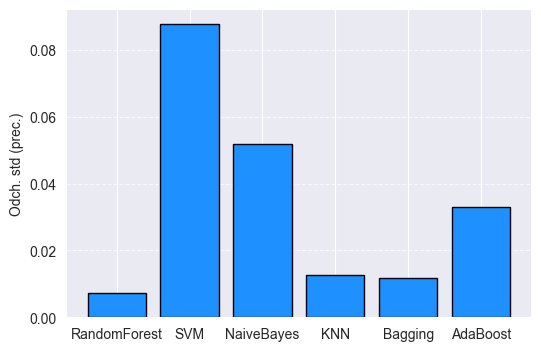

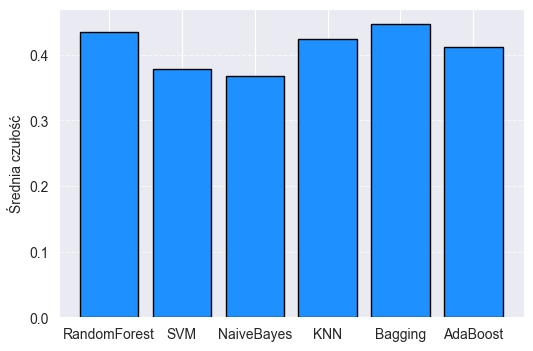

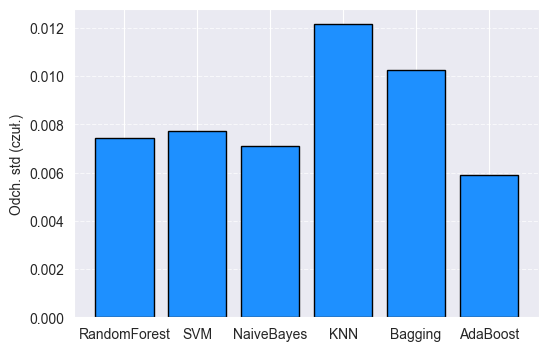

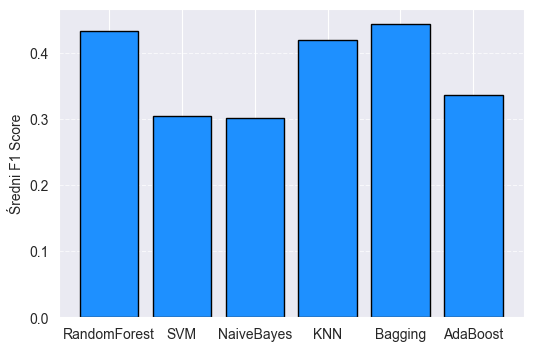

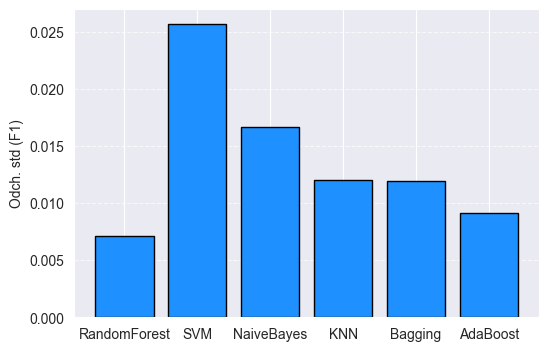

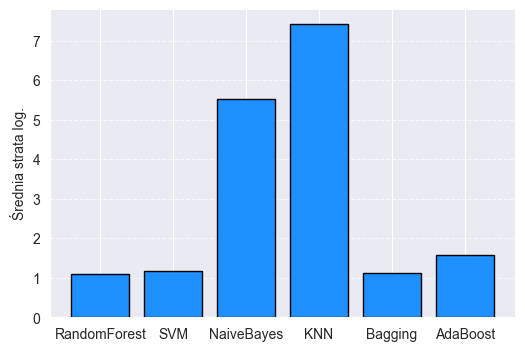

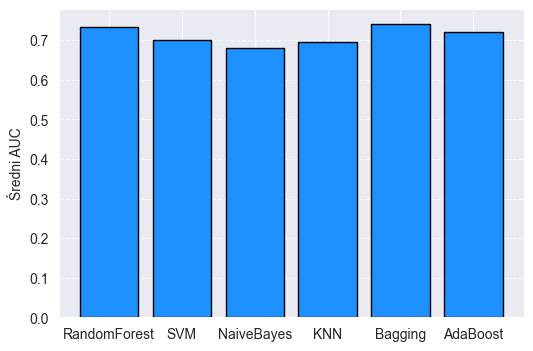

In [4]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

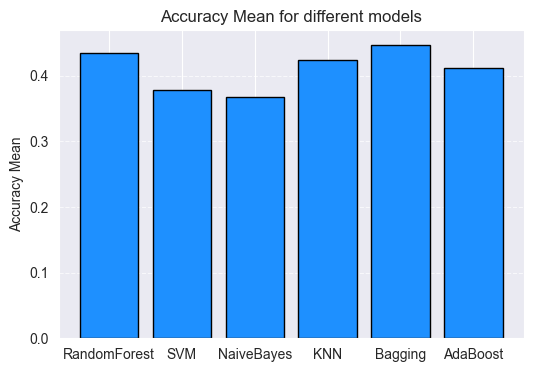

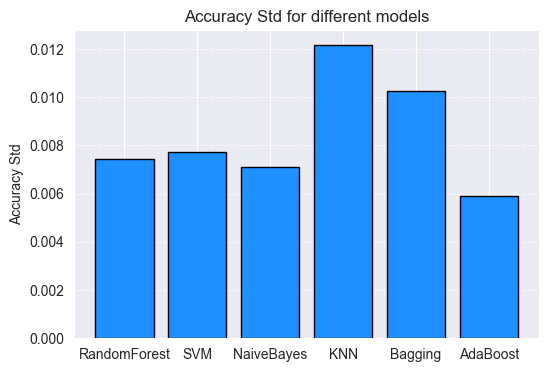

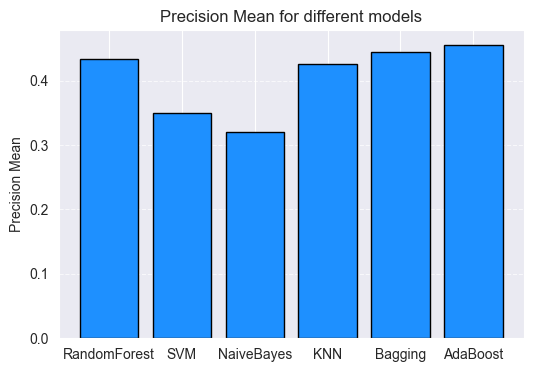

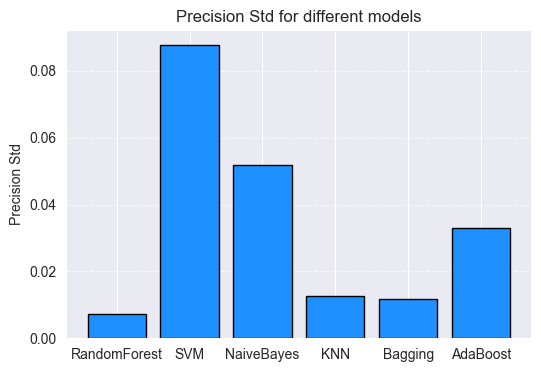

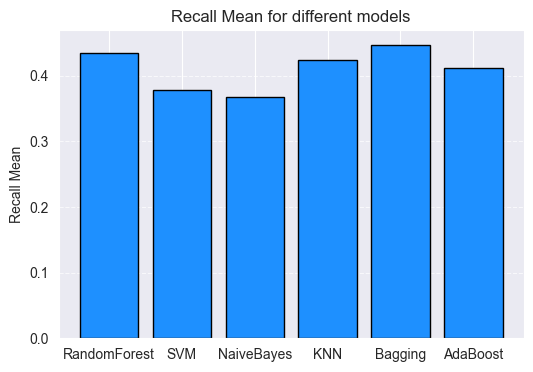

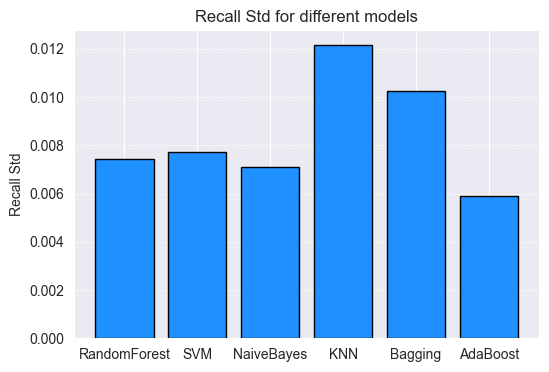

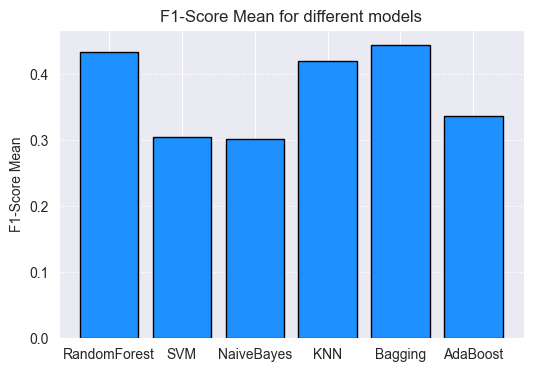

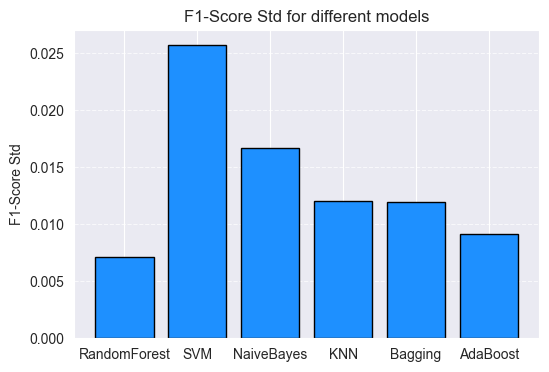

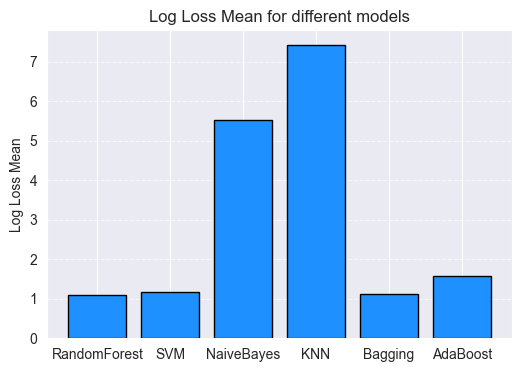

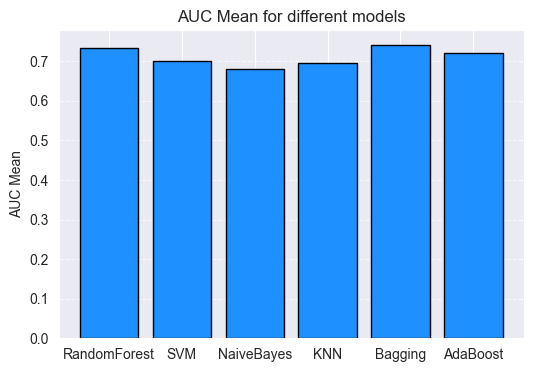

Best model: Bagging with F1-Score = 0.4443496805534915
Worst model: NaiveBayes with F1-Score = 0.30202865107132126


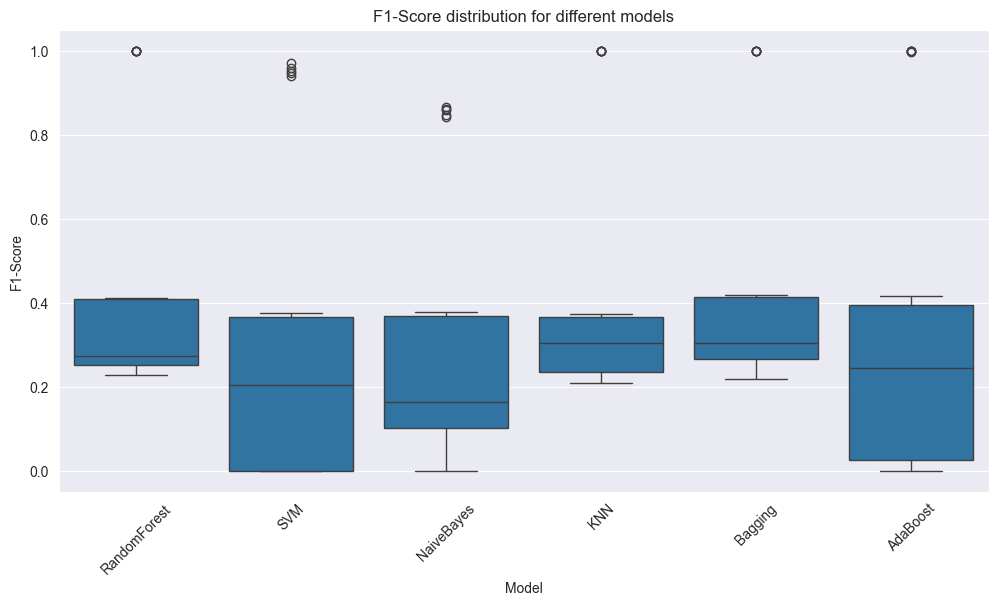

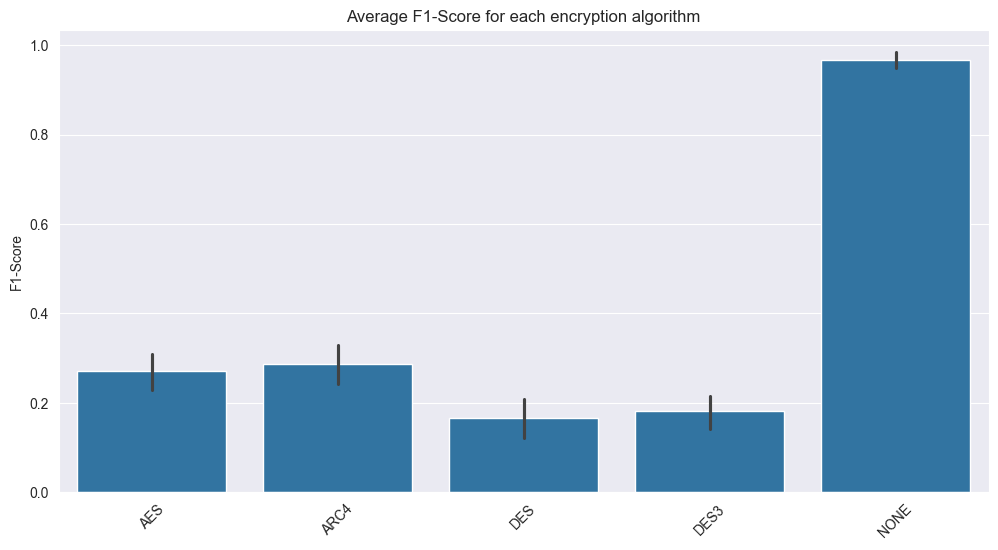

In [21]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [23]:
df_class_results_6keys = pd.read_csv('df_class_results_1800_cbc_6keys.csv')
df_class_results_6keys

,Unnamed: 0,Model,Class,Precision,Recall,F1-Score
0,0,RandomForest,0,0.275610,0.256818,0.265882
1,1,RandomForest,1,0.318996,0.458763,0.376321
2,2,RandomForest,2,0.281796,0.262791,0.271961
3,3,RandomForest,3,0.293255,0.221239,0.252207
4,4,RandomForest,4,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
145,145,AdaBoost,0,0.334601,0.192982,0.244784
146,146,AdaBoost,1,0.517647,0.097561,0.164179
147,147,AdaBoost,2,0.000000,0.000000,0.000000
148,148,AdaBoost,3,0.228510,0.787654,0.354248
